## Context: Understanding the increase of leads not showing up of their scheduled demo.

In [1]:
# Library to supress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from seaborn import countplot


In [2]:
# loading the datset

df = pd.read_excel('Thryv_RAR10_08.xlsx')
df.head()

,lead_id,business_size,completed_demo,no_show_demo,day_lead_created,device_type,hours_between_appointment,lifetime_event_count,medium,minutes_spent_on_site,page_name,source
0,00q3n00001wc0tuea1,5-9,1,0,Tue,-,18,-,organic,-,sales,none
1,00q3n00001wcc9reat,Only Me,1,0,Sun,iPhone,0,14,social,3.3,smb-lpk-5,facebook
2,00q3n00001wcefweah,2-4,1,0,Sat,Android,9,47,organic,25.15,sales,none
3,00q3n00001wd7trea1,2-4,1,0,Mon,iPhone,10,10,social,3.266667,smb-lpk-5,facebook
4,00q3n00001wdp2beax,10-20,1,0,Wed,Android,20,77,social,47.2,smb-lpk-5,facebook


In [3]:
df.lead_id.nunique()

2916

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2936 entries, 0 to 2935
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   lead_id                    2936 non-null   object
 1   business_size              2936 non-null   object
 2   completed_demo             2936 non-null   int64 
 3   no_show_demo               2936 non-null   int64 
 4   day_lead_created           2936 non-null   object
 5   device_type                2936 non-null   object
 6   hours_between_appointment  2936 non-null   int64 
 7   lifetime_event_count       2936 non-null   object
 8   medium                     2936 non-null   object
 9   minutes_spent_on_site      2936 non-null   object
 10  page_name                  2936 non-null   object
 11  source                     2931 non-null   object
dtypes: int64(3), object(9)
memory usage: 275.4+ KB


In [5]:
df["source"].fillna("none", inplace = True)
data=df.drop(columns='lead_id')


In [6]:
# her we define the threshhold or our age groups
hours_group = [-1, 1, 3, 9, 12,2000]

# and for convenience we give each of them a handy label
hours_group_names = ['0', '1-2', '3-8', '9-12', '>12']


data['group_by_hours_b4_appt'] = pd.cut(
    df['hours_between_appointment'], bins=hours_group, labels=hours_group_names)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2936 entries, 0 to 2935
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   business_size              2936 non-null   object  
 1   completed_demo             2936 non-null   int64   
 2   no_show_demo               2936 non-null   int64   
 3   day_lead_created           2936 non-null   object  
 4   device_type                2936 non-null   object  
 5   hours_between_appointment  2936 non-null   int64   
 6   lifetime_event_count       2936 non-null   object  
 7   medium                     2936 non-null   object  
 8   minutes_spent_on_site      2936 non-null   object  
 9   page_name                  2936 non-null   object  
 10  source                     2936 non-null   object  
 11  group_by_hours_b4_appt     2936 non-null   category
dtypes: category(1), int64(3), object(8)
memory usage: 255.5+ KB


## Univariate Analysis

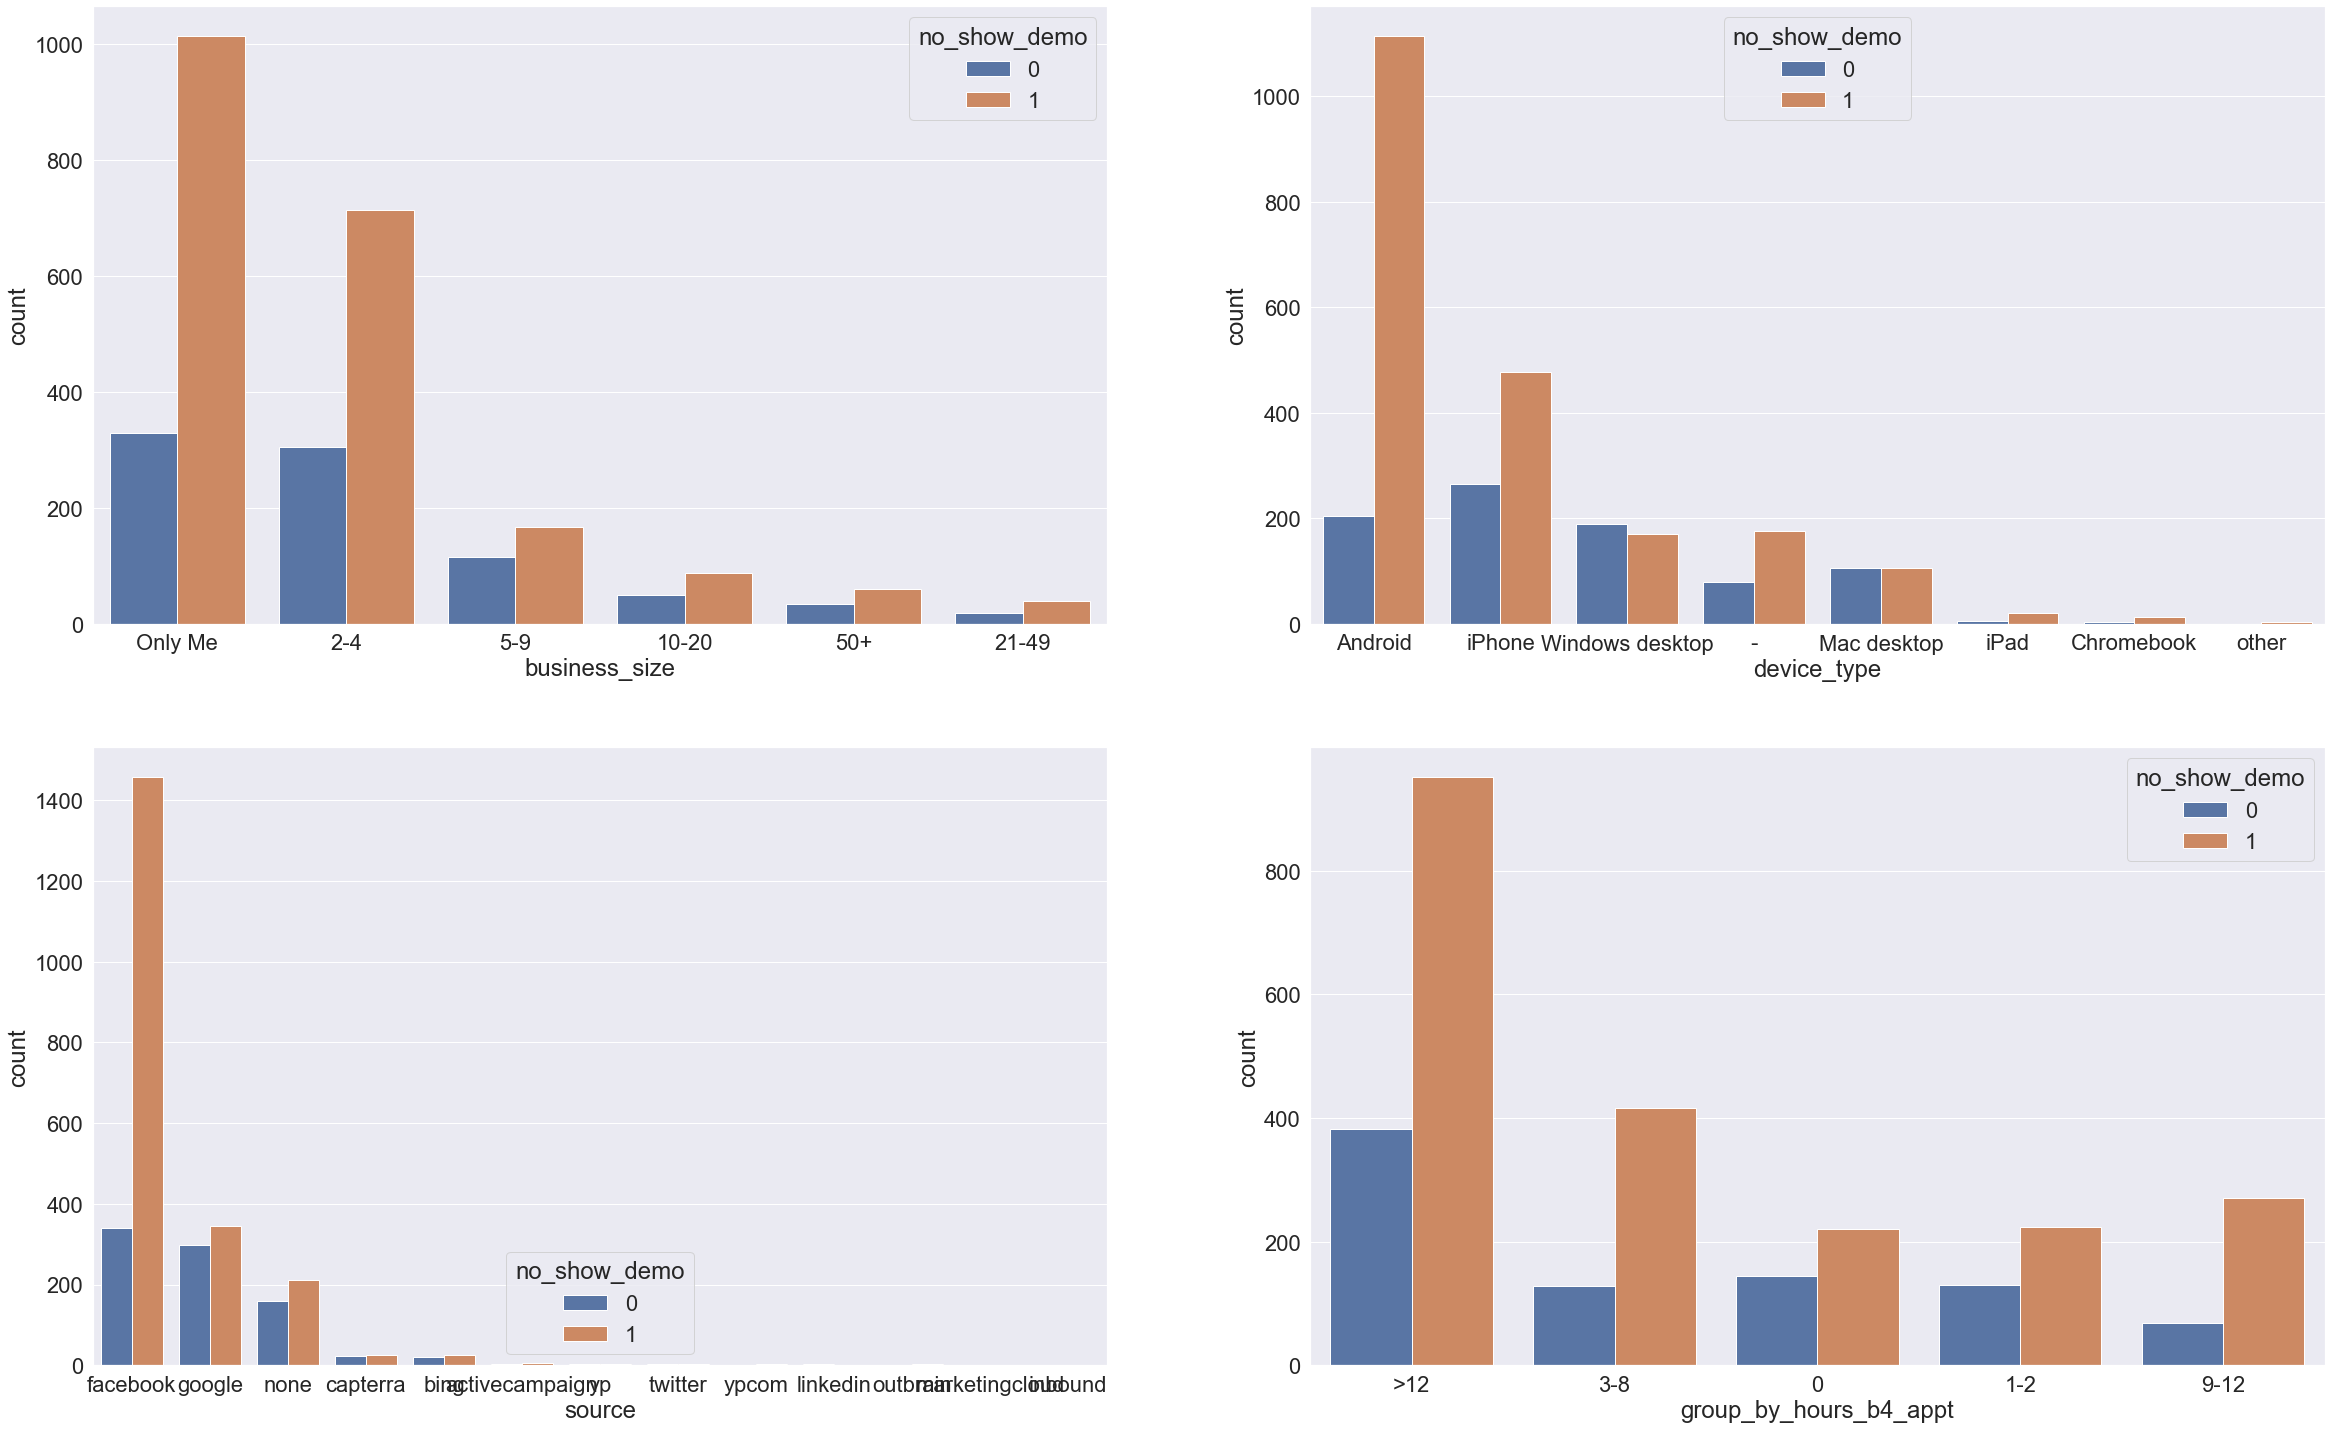

In [25]:
sns.set_palette("pastel")
sns.set(font_scale = 2)
fig, axes = plt.subplots(2, 2, figsize=(40, 25))
  

sns.countplot(ax=axes[0, 0], x='business_size', hue = 'no_show_demo', data=data,  
              order=data['business_size'].value_counts().index, );

#sns.countplot(ax=axes[1, 0], x='day_lead_created', hue = 'no_show_demo', data=data,  
 #             order=data['day_lead_created'].value_counts().index, );
                          
sns.countplot(ax=axes[0, 1], x='device_type', hue = 'no_show_demo', data=data,  
              order=data['device_type'].value_counts().index, );


#sns.countplot(ax=axes[1, 1], x='medium', hue = 'no_show_demo', data=data,  
              #order=data['medium'].value_counts().index, );

sns.countplot(ax=axes[1, 0], x='source', hue = 'no_show_demo', data=data,  
              order=data['source'].value_counts().index, );

sns.countplot(ax=axes[1, 1], x='group_by_hours_b4_appt', hue = 'no_show_demo', data=data,  
              order=data['group_by_hours_b4_appt'].value_counts().index, );



In [8]:
print(data.iloc[:, (np.where((data.dtypes == np.object)))[0]].columns)

Index(['business_size', 'day_lead_created', 'device_type',
       'lifetime_event_count', 'medium', 'minutes_spent_on_site', 'page_name',
       'source'],
      dtype='object')


In [28]:
data_business_size = data[data['business_size']=='Only Me']
data_facebook = data[data['source']=='facebook']
data_android = data[data['device_type']=='Android']

data_n_business_size = data[data['business_size']!='Only Me']
data_n_facebook = data[data['source']!='facebook']
data_n_android = data[data['device_type']!='Android']
data_n_business_size

,business_size,completed_demo,no_show_demo,day_lead_created,device_type,hours_between_appointment,lifetime_event_count,medium,minutes_spent_on_site,page_name,source,group_by_hours_b4_appt
0,5-9,1,0,Tue,-,18,-,organic,-,sales,none,>12
2,2-4,1,0,Sat,Android,9,47,organic,25.15,sales,none,3-8
3,2-4,1,0,Mon,iPhone,10,10,social,3.266667,smb-lpk-5,facebook,9-12
4,10-20,1,0,Wed,Android,20,77,social,47.2,smb-lpk-5,facebook,>12
5,10-20,1,0,Sun,iPhone,13,25,social,10.6,small-business-dm,facebook,>12
...,...,...,...,...,...,...,...,...,...,...,...,...
2920,2-4,1,0,Wed,iPhone,4,32,social,2.716667,small-business-dm,facebook,3-8
2924,2-4,0,1,Wed,Android,22,60,social,6.75,claim-google-my-business-lpk-1,facebook,>12
2926,5-9,0,1,Wed,iPhone,3,21,cpc,5,social-media-advertisement-lpk-1,google,1-2
2931,5-9,0,1,Wed,Mac desktop,23,46,organic,3.433333,home,none,>12


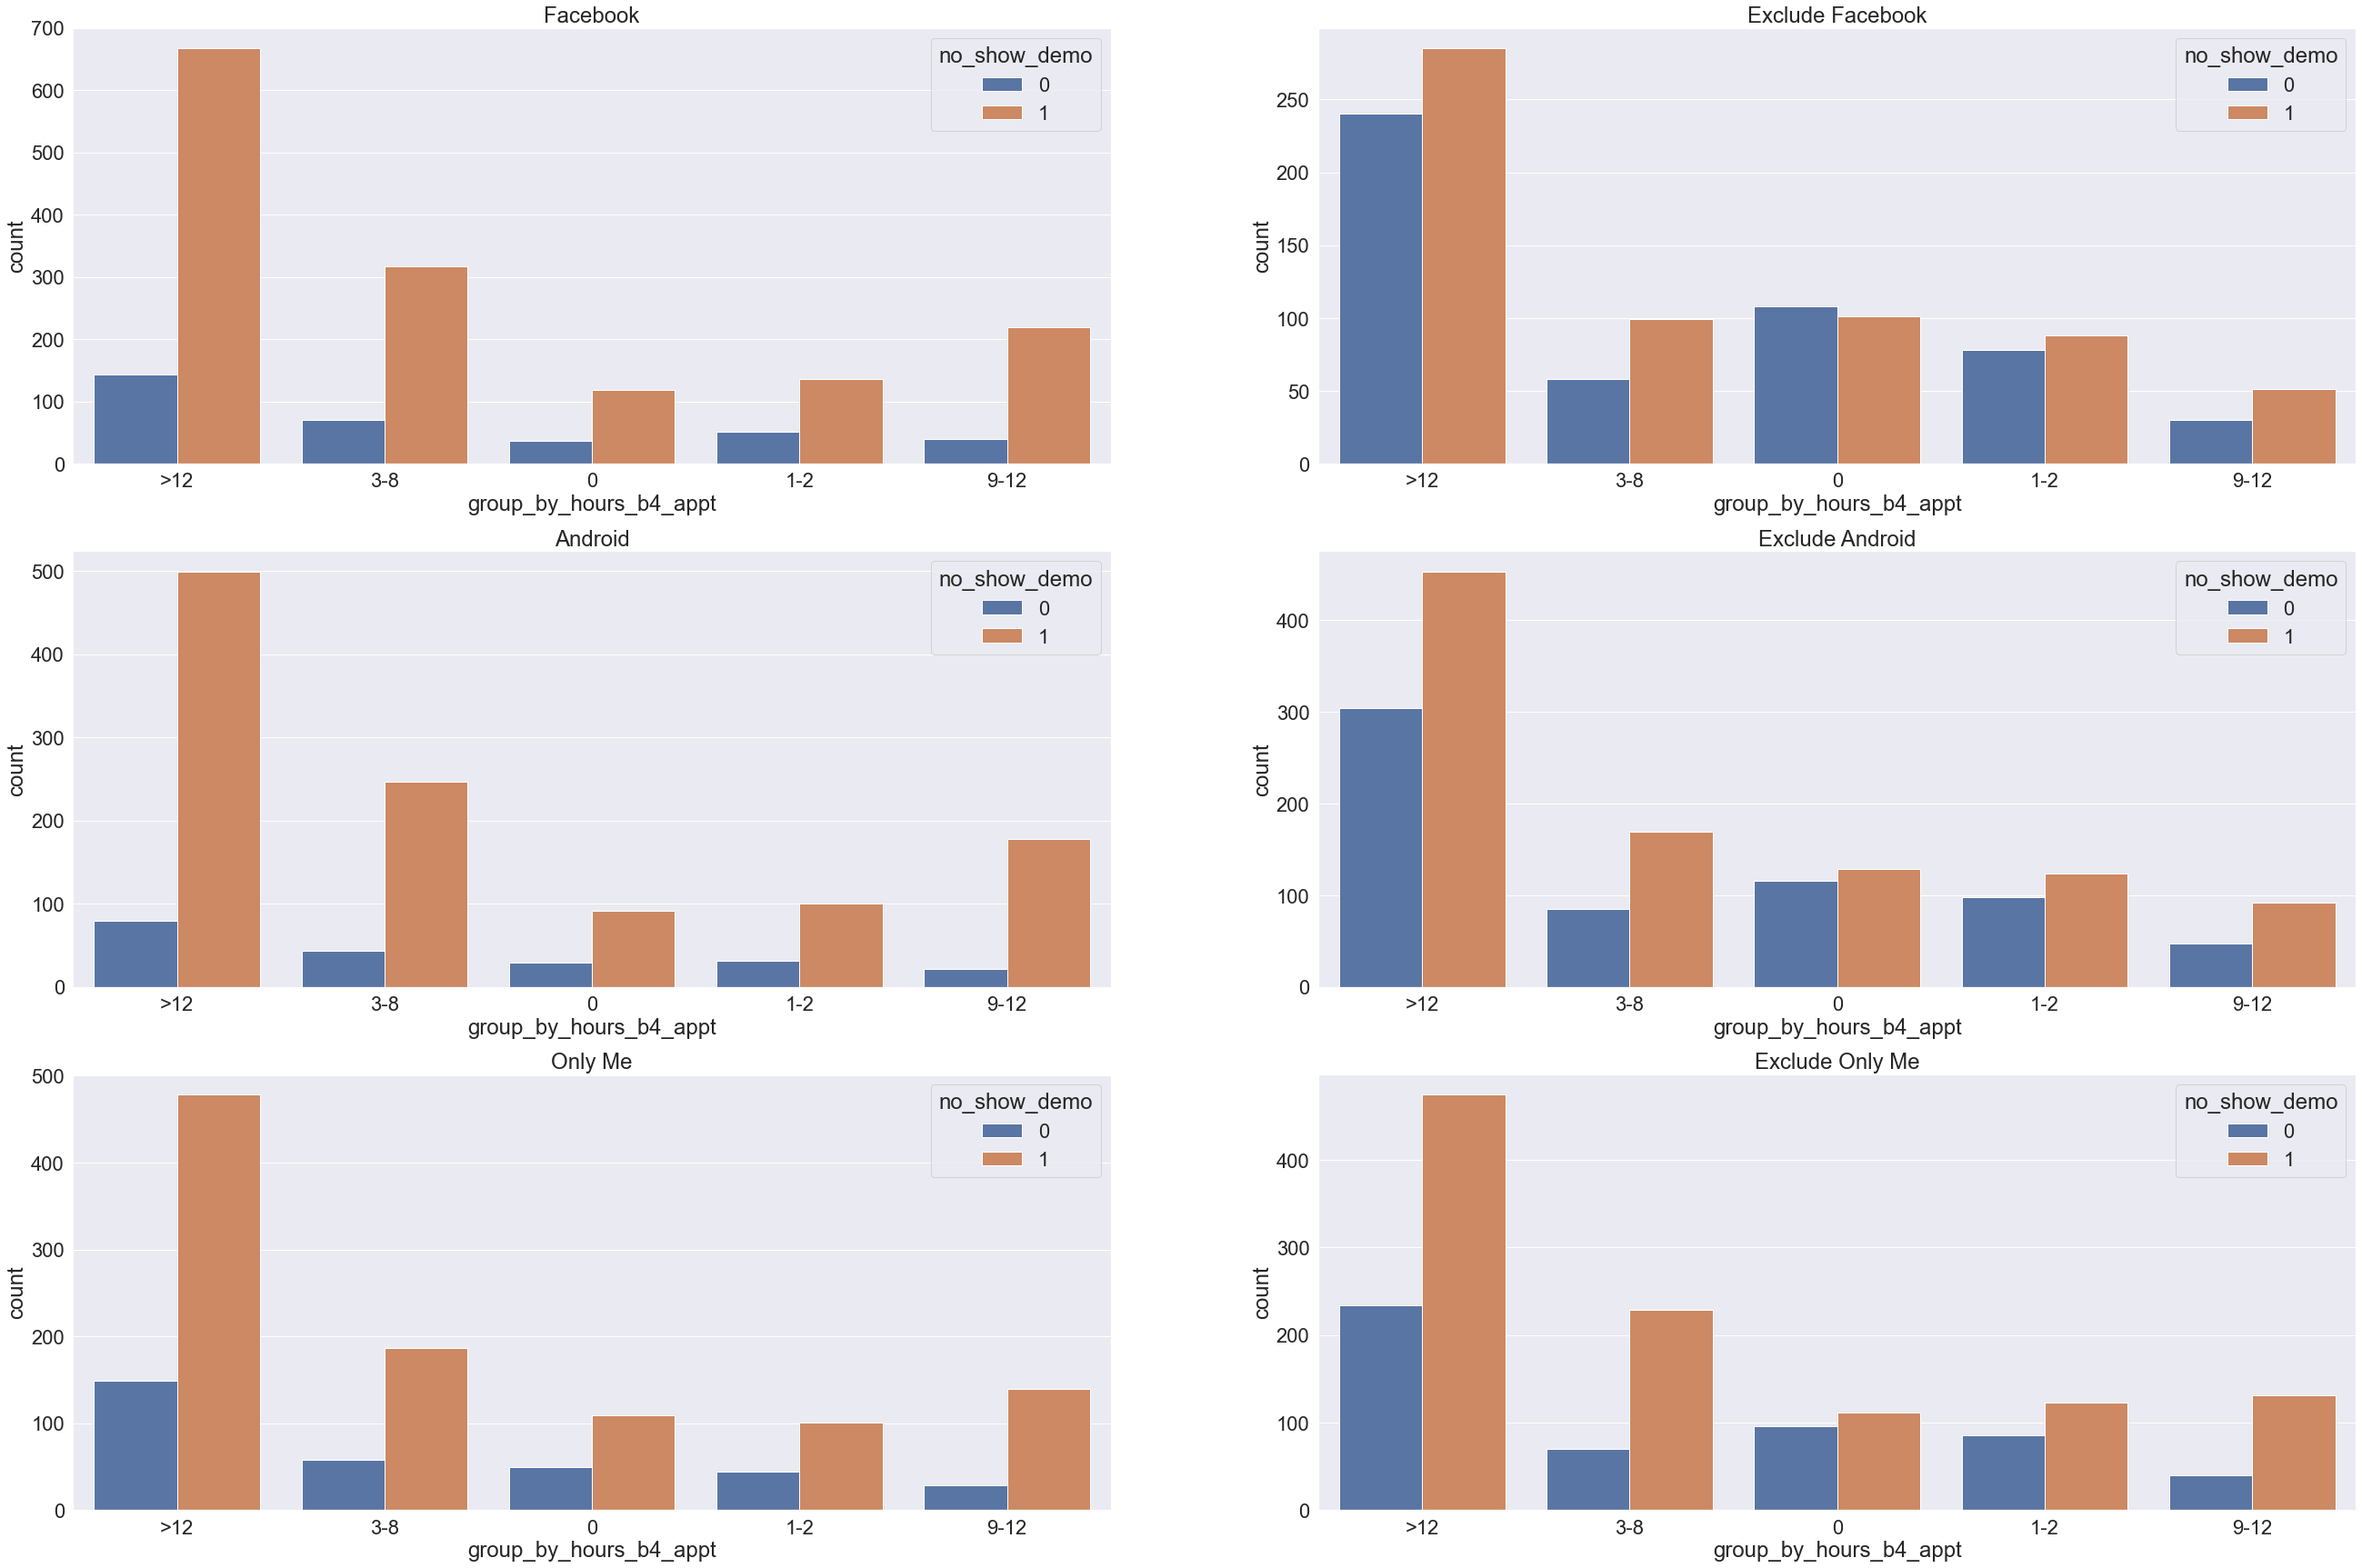

In [34]:
fig, axes = plt.subplots(3, 2, figsize=(45, 30))

sns.set(font_scale = 2)


sns.countplot(ax=axes[0, 0], x='group_by_hours_b4_appt', hue = 'no_show_demo', data=data_facebook,  
              order=data['group_by_hours_b4_appt'].value_counts().index, ).set(title='Facebook');

sns.countplot(ax=axes[1, 0], x='group_by_hours_b4_appt', hue = 'no_show_demo', data=data_android,  
              order=data['group_by_hours_b4_appt'].value_counts().index, ).set(title='Android');

sns.countplot(ax=axes[2, 0], x='group_by_hours_b4_appt', hue = 'no_show_demo', data=data_business_size,  
              order=data['group_by_hours_b4_appt'].value_counts().index, ).set(title='Only Me');

sns.countplot(ax=axes[0, 1], x='group_by_hours_b4_appt', hue = 'no_show_demo', data=data_n_facebook,  
              order=data['group_by_hours_b4_appt'].value_counts().index, ).set(title='Exclude Facebook');

sns.countplot(ax=axes[1, 1], x='group_by_hours_b4_appt', hue = 'no_show_demo', data=data_n_android,  
              order=data['group_by_hours_b4_appt'].value_counts().index, ).set(title='Exclude Android');

sns.countplot(ax=axes[2, 1], x='group_by_hours_b4_appt', hue = 'no_show_demo', data=data_n_business_size,  
              order=data['group_by_hours_b4_appt'].value_counts().index, ).set(title='Exclude Only Me');